# UG Project - Traffic Accident Analysis

- **Traffic Accident -** A Traffic Accident is defined as an accident involving at least one vehicle on a road open to public traffic in which at least one person is injured of killed.

### Contents
* [Data Cleaning](#Data-Cleaning)  
* [Feature Manipulation](#Feature-Manipulation)  
* [Visualisations](#Visualisations)

## Importing needed Libraries

In [1]:
#Import modules
import numpy as np
import pandas as pd
import time
import timeit

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
import math

#warning ignorer
import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
C:\Ac\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option('display.max_columns',50)

## Importing needed Datasets

- Datasets = 2016 Accidents, 2016 Vehicles

In [3]:
acc_raw = pd.read_csv('2016 Accidents.csv')
veh_raw = pd.read_csv('2016 Vehicles.csv')

In [4]:
# defining a function to calculate missing values from DataFrame

def miss(df):
    count = df.isna().sum().sort_values(ascending=False)
    percent = ((df.isna().sum())/(df.isna().count())*100).sort_values(ascending=False)
    result = pd.concat((count, percent), axis=1, keys=['Count','Percentage'])
    result = result[result.Percentage>0]
    return result

### Merging

In [5]:
acc_raw1 = acc_raw.where(~(acc_raw==-1),np.nan, errors='ignore')
veh_raw1 = veh_raw.where(~(veh_raw==-1),np.nan, errors='ignore')

In [6]:
df = pd.merge(acc_raw1, veh_raw1)

In [7]:
df.describe(include='all')

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,...,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,252500,252488.000000,2.524880e+05,252488.000000,252488.000000,252500.000000,252500.000000,252500.000000,252500.000000,252500,252500.000000,252496,252500.000000,252500,252500.000000,252500.000000,252498.000000,252435.000000,252340.000000,150277.000000,149520.000000,251292.000000,252123.000000,251392.000000,252475.000000,...,252500.000000,252500.000000,237751,252500.000000,252164.000000,251614.000000,251558.000000,251540.000000,251839.000000,251669.000000,251360.000000,251448.000000,251995.000000,251235.000000,251426.000000,252486.00000,252458.000000,223082.000000,223082.000000,193720.000000,194240.000000,184325.000000,184935.000000,205010.000000,184935.000000
unique,136621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366,NaN,1439,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016140142191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/11/2016,NaN,17:00,NaN,E10000016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,E01032739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052,NaN,2427,NaN,8404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,449175.559496,2.869323e+05,-1.297562,52.469835,29.965497,2.828067,2.121022,1.401952,NaN,4.111600,NaN,344.319362,NaN,4.062202,911.674998,5.133787,38.560540,2.281608,3.608749,5.255585,329.476251,0.011133,0.788227,1.939214,...,1.363030,1.247271,NaN,1.561006,9.795371,0.031989,12.620338,0.138646,2.582725,0.194505,0.308183,0.324548,0.443945,1.801632,1.005381,4.73029,1.424241,40.287450,6.884253,1868.633998,1.520675,8.138050,5.212826,1.321145,5.212826
std,NaN,94752.591439,1.550480e+05,1.391228,1.396373,24.944753,0.407810,0.857370,0.889197,NaN,1.906537,NaN,255.592741,NaN,1.467786,1740.371706,1.676474,14.378379,2.514132,0.816863,1.241615,1216.823718,0.141776,1.888686,1.643652,...,0.480973,0.459210,NaN,0.734394,9.901966,0.315839,6.197295,1.004464,3.210464,0.754117,1.588827,1.296315,1.912759,1.163567,0.073160,1.99181,0.625119,16.287479,1.770590,1631.050907,0.915808,5.154017,2.811973,0.671403,2.811973
min,NaN,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,0.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,387134.000000,1.763400e+05,-2.192971,51.473251,6.000000,3.000000,2.000000,1.000000,NaN,3.000000,NaN,109.000000,NaN,3.000000,0.000000,3.000000,30.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,NaN,1.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.

In [8]:
miss(df)

,Count,Percentage
2nd_Road_Class,102980,40.784158
Junction_Control,102223,40.484356
Age_of_Vehicle,68175,27.000000
Vehicle_IMD_Decile,67565,26.758416
Driver_IMD_Decile,67565,26.758416
Engine_Capacity_(CC),58780,23.279208
Propulsion_Code,58260,23.073267
Driver_Home_Area_Type,47490,18.807921
Age_Band_of_Driver,29418,11.650693
Age_of_Driver,29418,11.650693


## Data Cleaning

In [9]:
df = df.drop(['2nd_Road_Class','2nd_Road_Number','Junction_Control','Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location'], axis=1)

In [10]:
miss(df).head()

,Count,Percentage
Age_of_Vehicle,68175,27.000000
Vehicle_IMD_Decile,67565,26.758416
Driver_IMD_Decile,67565,26.758416
Engine_Capacity_(CC),58780,23.279208
Propulsion_Code,58260,23.073267


#### Age of Vehicle

In [11]:
df['Age_of_Vehicle'].describe()

count    184325.000000
mean          8.138050
std           5.154017
min           1.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          75.000000
Name: Age_of_Vehicle, dtype: float64

Changing null values of 'Age_of_Vehicle' to the median, then creating categories.

In [12]:
df['Age_of_Vehicle'].fillna(8, inplace=True)

df['Age_of_Vehicle'] = pd.cut(df['Age_of_Vehicle'],
                              [0,2,5,8,12,15,22,75],
                              labels=['1','2','3','4','5','6','7'])

#### Vehicle_IMD_Decile

In [13]:
df[['Vehicle_IMD_Decile','Driver_IMD_Decile']].corr()

,Vehicle_IMD_Decile,Driver_IMD_Decile
Vehicle_IMD_Decile,1.0,1.0
Driver_IMD_Decile,1.0,1.0


In [14]:
df = df.drop('Vehicle_IMD_Decile',axis=1)

It is same as Driver_IMD_Decile

#### Driver_IMD_Decile

In [15]:
df['Driver_IMD_Decile'].value_counts()/df.shape[0]*100

2.0     8.411881
3.0     8.071683
4.0     8.016238
1.0     7.754455
5.0     7.689505
6.0     7.434059
7.0     6.965941
8.0     6.656634
9.0     6.540990
10.0    5.700198
Name: Driver_IMD_Decile, dtype: float64

In [16]:
df.corr()['Driver_IMD_Decile'].sort_values().tail(3)

Police_Force             0.224563
Driver_Home_Area_Type    0.232392
Driver_IMD_Decile        1.000000
Name: Driver_IMD_Decile, dtype: float64

In [17]:
df = df.drop('Driver_IMD_Decile', axis=1)

#### Engine Capacity, Propulsion Code

In [18]:
df = df.drop(['Engine_Capacity_(CC)','Propulsion_Code'], axis=1)

Dropping Engine Capacity and Propulsion Code as we have 'Vehicle Type'

In [19]:
miss(df).head()

,Count,Percentage
Driver_Home_Area_Type,47490,18.807921
Age_Band_of_Driver,29418,11.650693
Age_of_Driver,29418,11.650693
Road_Surface_Conditions,1313,0.520000
1st_Point_of_Impact,1265,0.500990


#### Age of Driver

In [20]:
df = df.drop('Age_Band_of_Driver', axis=1)

In [21]:
df['Age_of_Driver'].describe()

count    223082.000000
mean         40.287450
std          16.287479
min           1.000000
25%          27.000000
50%          38.000000
75%          51.000000
max         101.000000
Name: Age_of_Driver, dtype: float64

In [22]:
df['Age_of_Driver'].fillna(df['Age_of_Driver'].dropna().median(), inplace=True)

In [23]:
df['Age_Band_of_Driver'] = pd.cut(df['Age_of_Driver'],
                                  [0,15,25,45,65,110],
                                  labels=['1','2','3','4','5'])

#### Drive Home Area

In [24]:
df['Driver_Home_Area_Type'].describe()

count    205010.000000
mean          1.321145
std           0.671403
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: Driver_Home_Area_Type, dtype: float64

In [25]:
df['Driver_Home_Area_Type'].value_counts()/df.shape[0]*100

1.0    64.567129
3.0     9.449505
2.0     7.175446
Name: Driver_Home_Area_Type, dtype: float64

In [26]:
df['Driver_Home_Area_Type'].fillna(1, inplace=True)

#### Drop Null Values

In [27]:
df.dropna(inplace=True)

In [28]:
miss(df)

,Count,Percentage


## Feature Manipulation

#### Casualties

In [29]:
df['Number_of_Casualties'].value_counts()

1     184368
2      42413
3      13491
4       5046
5       1925
6        769
7        252
8        120
9         65
10        47
12        37
11        13
14         9
15         7
19         5
13         4
16         4
27         4
21         3
23         3
18         2
58         2
Name: Number_of_Casualties, dtype: int64

In [30]:
#create casualities grouping

def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "4+"

In [31]:
df['Number_of_Casualties']= df['Number_of_Casualties'].apply(casualities)

In [32]:
df['Number_of_Casualties'].value_counts()

1     184368
2      42413
3      13491
4       5046
4+      3271
Name: Number_of_Casualties, dtype: int64

#### Date

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [34]:
# slicing 1st and 2nd string from Time for Hours
df['Hour'] = df['Time'].str[0:2]

# converting new column into numeric datatype
df['Hour'] = pd.to_numeric(df['Hour'])

In [35]:
df['Month'] = df['Date'].apply(lambda time: time.month)

In [36]:
df['Daytime']=0
df.loc[(df.Hour>=6) & (df.Hour<10), 'Daytime'] = 'Morning Rush (6,10)'
df.loc[(df.Hour>=10) & (df.Hour<16), 'Daytime'] = 'Office Hours (10,16)'
df.loc[(df.Hour>=16) & (df.Hour<18), 'Daytime'] = 'Afternoon Rush (16,18)'
df.loc[(df.Hour>=18) & (df.Hour<22), 'Daytime'] = 'Evening (18,22)'
df.loc[(df.Hour>=22) | (df.Hour<6), 'Daytime'] = 'Night Hours (22,6)'

#### Vehicle Type

In [37]:
#Vehicle_Type
df['Vehicle_Type'].value_counts()/df.shape[0]*100

9.0     71.232838
1.0      7.514411
19.0     5.210206
3.0      3.640145
5.0      2.674696
8.0      2.076118
11.0     1.978366
21.0     1.699995
4.0      0.889420
2.0      0.762302
20.0     0.618692
90.0     0.561569
98.0     0.424798
17.0     0.208778
10.0     0.182228
97.0     0.145220
22.0     0.102579
16.0     0.044250
23.0     0.024538
18.0     0.008850
Name: Vehicle_Type, dtype: float64

In [38]:
#motorcycles
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=5, 
                                                        value="Motorcycle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=4,
                                                        value="Motorcycle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=3, 
                                                value="Motorcycle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=2, 
                                                        value="Motorcycle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=23, 
                                                        value="Motorcycle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=97, 
                                                        value="Motorcycle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=22, 
                                                        value="Motorcycle")


#Goods_vehicle
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=19, 
                                                        value="Goods Vehicle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=20, 
                                                        value="Goods Vehicle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=98, 
                                                        value="Goods Vehicle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=21, 
                                                        value="Goods Vehicle")

#car
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=8, 
                                                        value="Car")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=9, 
                                                        value="Car")


#bus
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=10, 
                                                        value="Bus")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=11, 
                                                        value="Bus")

#other vehicle
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=1, 
                                                        value="Other Vehicle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=16, 
                                                        value="Other Vehicle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=17, 
                                                        value="Other Vehicle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=18, 
                                                        value="Other Vehicle")
df['Vehicle_Type'] = df['Vehicle_Type'].replace(to_replace=90, 
                                                        value="Other Vehicle")

In [39]:
#Vehicle_Type
df['Vehicle_Type'].value_counts()/df.shape[0]*100

Car              73.308956
Other Vehicle     8.337859
Motorcycle        8.238900
Goods Vehicle     7.953691
Bus               2.160594
Name: Vehicle_Type, dtype: float64

#### Number of Vehicles

In [40]:
# number_of_vehicles
df['Number_of_Vehicles'].value_counts()/df.shape[0]*100

2     65.574502
1     15.597633
3     13.121659
4      3.904839
5      1.026996
6      0.402673
7      0.189872
8      0.083672
9      0.039825
10     0.024136
11     0.017700
16     0.006436
13     0.005230
12     0.004827
Name: Number_of_Vehicles, dtype: float64

In [41]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "3+"
     
df['Number_of_Vehicles']= df['Number_of_Vehicles'].apply(vehicles)

In [42]:
df['Number_of_Vehicles'].value_counts()

2     163011
1      38774
3      32619
3+     14185
Name: Number_of_Vehicles, dtype: int64

#### Seriousness

In [43]:
df['Seriousness'] = df['Accident_Severity']
df['Seriousness'] = df['Seriousness'].replace(to_replace=3, value='Not Serious')
df['Seriousness'] = df['Seriousness'].replace(to_replace=2, value='Serious')
df['Seriousness'] = df['Seriousness'].replace(to_replace=1, value='Serious')

In [44]:
df.to_csv('2016_combined_filled.csv')

# CheckPoint-1

In [45]:
data = pd.read_csv('2016_combined_filled.csv', parse_dates=['Date'])

In [46]:
data.head()

,Unnamed: 0,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Age_Band_of_Driver,Hour,Month,Daytime,Seriousness
0,0,2016010000005,-0.279323,51.584754,1,3,2,1,2016-11-01,3,02:30,28,E09000005,3,4006,6.0,30.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1,1,1,Car,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,51.0,3,1.0,4,2,11,"Night Hours (22,6)",Not Serious
1,1,2016010000005,-0.279323,51.584754,1,3,2,1,2016-11-01,3,02:30,28,E09000005,3,4006,6.0,30.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1,1,2,Motorcycle,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,23.0,2,1.0,2,2,11,"Night Hours (22,6)",Not Serious
2,2,2016010000006,0.184928,51.449595,1,3,1,1,2016-11-01,3,00:37,18,E09000004,3,207,6.0,30.0,9.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,1,1,Car,0.0,18.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,6.0,2.0,36.0,1,1.0,3,0,11,"Night Hours (22,6)",Not Serious
3,3,2016010000008,-0.473837,51.543563,1,3,1,1,2016-11-01,3,01:25,26,E09000017,3,4020,1.0,30.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,1,1,Car,0.0,18.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,24.0,2,1.0,2,1,11,"Night Hours (22,6)",Not Serious
4,4,2016010000016,-0.164442,51.404958,1,3,1,1,2016-11-01,3,09:15,22,E09000024,3,217,6.0,30.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1,1,Bus,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,55.0,3,1.0,4,9,11,"Morning Rush (6,10)",Not Serious


# Visualisations

### 1. Accident Seriousness

- **Serious Accidents :** Accidents in which a person dies in an accident, or which is one the of categories :-
> 1. an injury for which a person is detained in a hospital.
> 2. any of the following injuries : fractures, concussion, internal injuries, crushings, severe cuts.
- **Non Serious Accidents :** Accidents in which at least one person is slightly injured, and no one is seriously or fatally injured.

In [49]:
sev = data[['Accident_Index','Seriousness']].groupby('Seriousness').nunique()
sev

,Accident_Index
Seriousness,
Not Serious,111485
Serious,23211


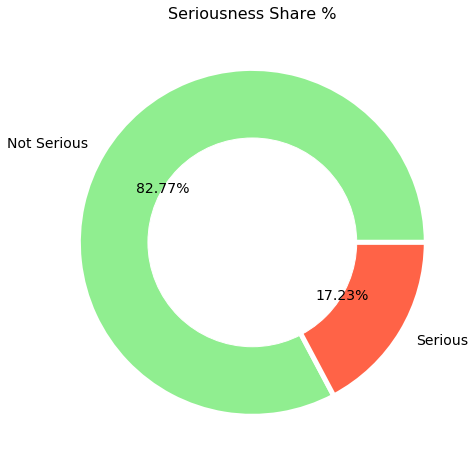

In [50]:
sev = data[['Accident_Index','Seriousness']].groupby('Seriousness').nunique()

plt.figure(figsize=(8,8))
plt.pie(x=sev, labels=['Not Serious','Serious'], colors=['lightgreen', 'tomato'],
        autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':14}, wedgeprops={'linewidth':5, 'edgecolor':'white'});

circle = plt.Circle((0,0), 0.6, color='white')

fig=plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(circle)
plt.title('Seriousness Share %', fontsize=16);

### 2. Number of Vehicles involved

In [51]:
veh = data[['Accident_Index','Number_of_Vehicles']].groupby('Number_of_Vehicles', as_index=False).nunique()
veh

,Number_of_Vehicles,Accident_Index
0,1,38774
1,2,81798
2,3,10893
3,3+,3231


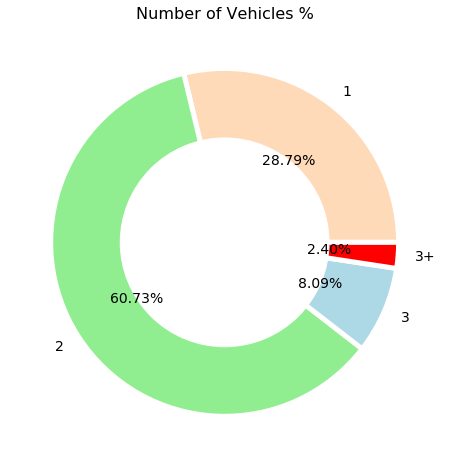

In [52]:
plt.figure(figsize=(8,8))
plt.pie(x=veh.Accident_Index, labels=veh.Number_of_Vehicles, colors=['peachpuff','lightgreen','lightblue','red'],
        autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':14}, wedgeprops={'linewidth':5, 'edgecolor':'white'});

circle = plt.Circle((0,0), 0.6, color='white')

fig=plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(circle)
plt.title('Number of Vehicles %', fontsize=16);

### 3. Number of Casualties

- **Casualty :** A person killed or injured in an accident. One accident may give rise to several casualties.

In [53]:
data.groupby('Number_of_Casualties')['Accident_Index'].nunique()

Number_of_Casualties
1     105075
2      20388
3       5929
4       2070
4+      1234
Name: Accident_Index, dtype: int64

In [54]:
cas = data[['Accident_Index','Number_of_Casualties']].groupby('Number_of_Casualties', as_index=False).nunique()
cas

,Number_of_Casualties,Accident_Index
0,1,105075
1,2,20388
2,3,5929
3,4,2070
4,4+,1234


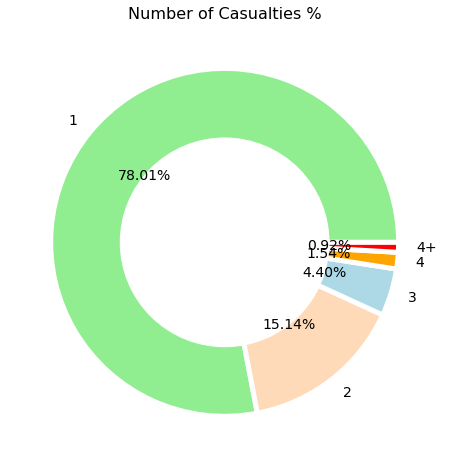

In [55]:
plt.figure(figsize=(8,8))
plt.pie(x=cas.Accident_Index, labels=cas.Number_of_Casualties, colors=['lightgreen','peachpuff','lightblue','orange','red'],
        autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':14}, wedgeprops={'linewidth':5, 'edgecolor':'white'});

circle = plt.Circle((0,0), 0.6, color='white')

fig=plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(circle)
plt.title('Number of Casualties %', fontsize=16);

### 4. Accidents on Weekdays

In [56]:
wd_count = data[['Accident_Index','Day_of_Week']].groupby('Day_of_Week', as_index=False).nunique()
wd_count

,Day_of_Week,Accident_Index
0,1,14845
1,2,18990
2,3,19808
3,4,20549
4,5,20656
5,6,22278
6,7,17570


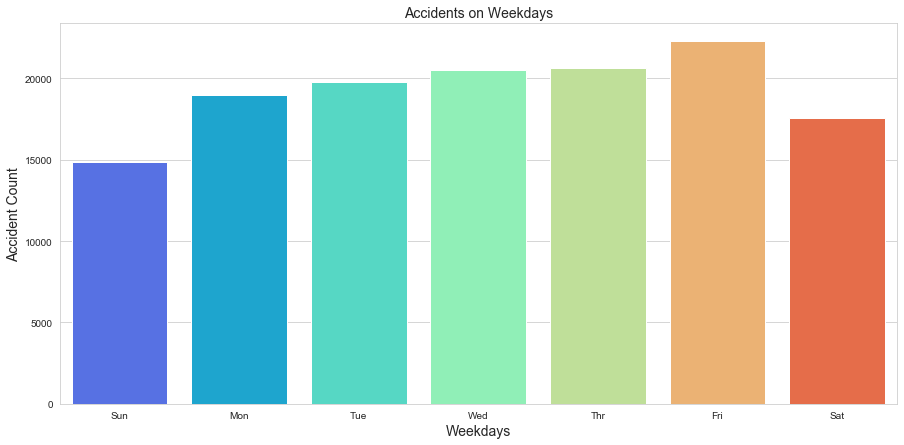

In [57]:
wd_count = data[['Accident_Index','Day_of_Week']].groupby('Day_of_Week', as_index=False).nunique()

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.barplot(x=wd_count.Day_of_Week, y=wd_count.Accident_Index, palette='rainbow');
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Accident Count', fontsize=14)
plt.title('Accidents on Weekdays', fontsize=14)
plt.xticks(np.arange(7),('Sun','Mon','Tue','Wed','Thr','Fri','Sat'));

### 5. Time Slot of Accidents

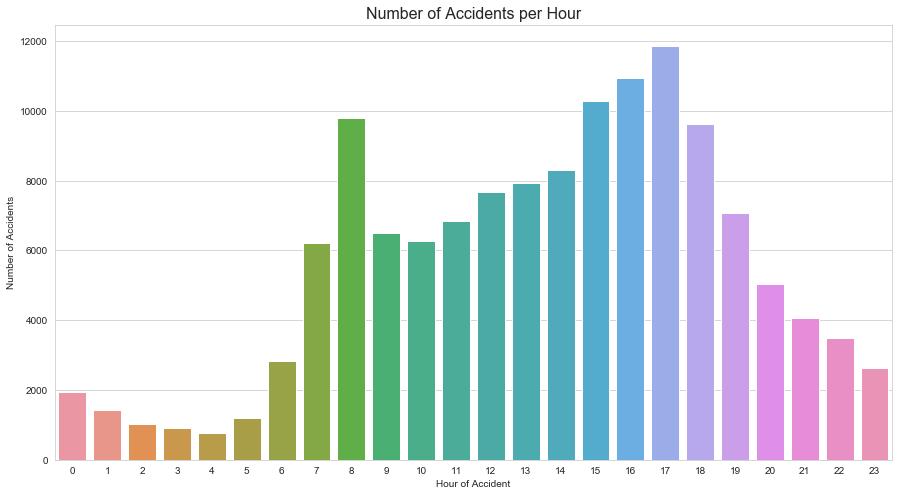

In [58]:
hr = data[['Accident_Index', 'Hour']].groupby('Hour', as_index=False).nunique()
plt.figure(figsize=(15,8))
sns.barplot(x=hr.Hour, y=hr.Accident_Index)
plt.xlabel('Hour of Accident')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Hour', fontsize=16);

### 6. Accidents in Time Groups

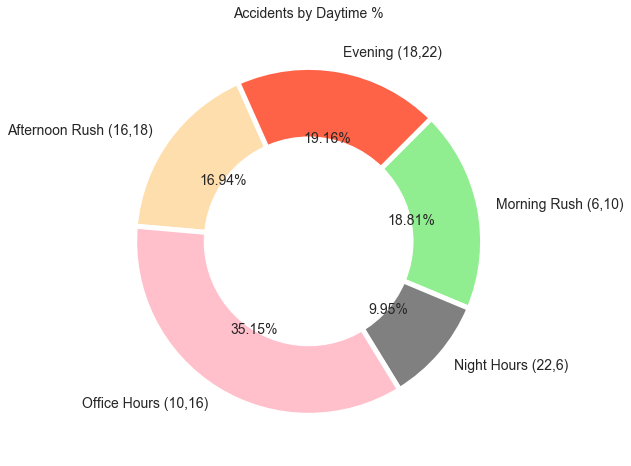

In [59]:
gr = data.groupby(['Daytime'])['Accident_Index'].nunique()

plt.figure(figsize=(8,8))
plt.pie(x=gr.values, labels=gr.index, colors=['navajowhite','tomato','lightgreen','gray','pink'],
        autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':14}, wedgeprops={'linewidth':5, 'edgecolor':'white'},
        counterclock = False, startangle=175);

circle = plt.Circle((0,0), 0.6, color='white')

fig=plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(circle)
plt.title('Accidents by Daytime %', fontsize=14);

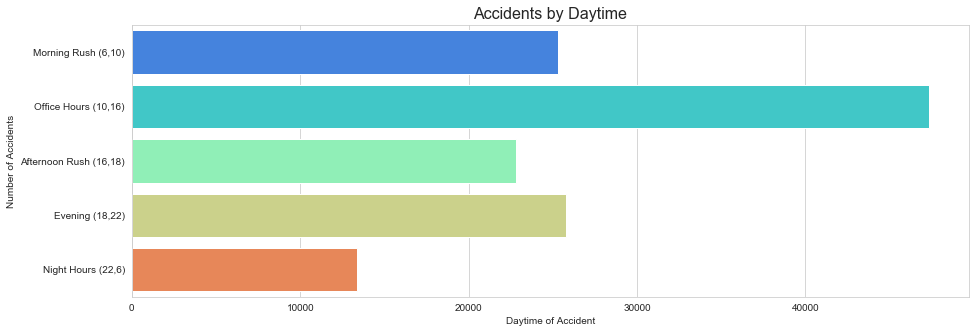

In [60]:
plt.figure(figsize=(15,5))
tod=["Morning Rush (6,10)", "Office Hours (10,16)", "Afternoon Rush (16,18)", "Evening (18,22)", "Night Hours (22,6)"]
sns.barplot(y=gr.index, x=gr.values, order=tod, palette='rainbow')
plt.xlabel('Daytime of Accident')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Daytime', fontsize=16);

### 7. Accident Seriousness in Daytime

In [61]:
grs = data[['Daytime','Seriousness','Accident_Index']].groupby(['Daytime','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Daytime', columns='Seriousness', values='Accident_Index')
count = count.reindex(tod)

In [62]:
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

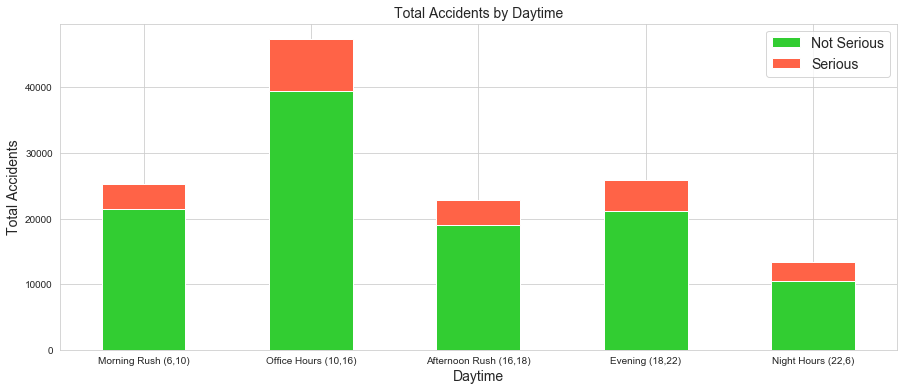

In [63]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Daytime', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Total Accidents by Daytime', fontsize=14);

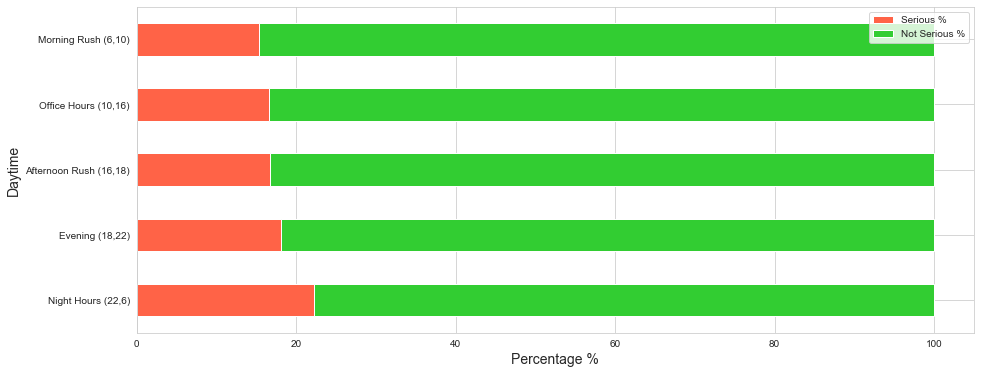

In [64]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Daytime', fontsize=14);

### 8. Number of Accidents per Month

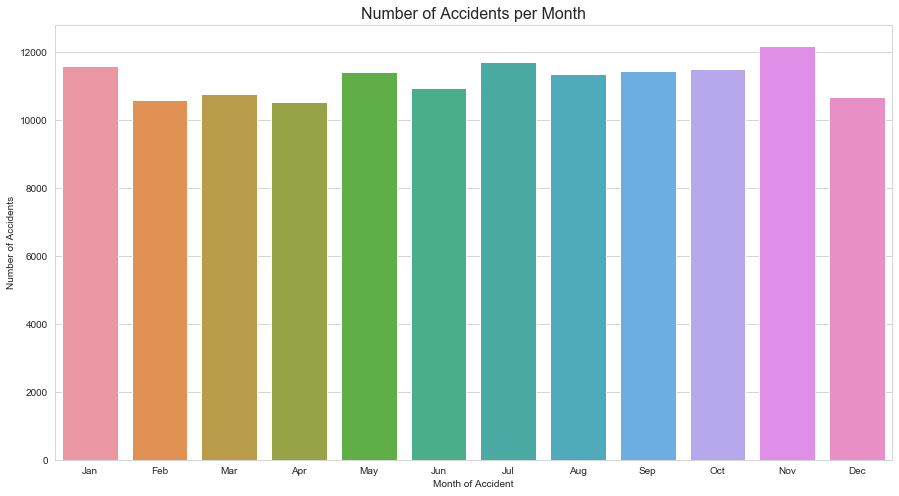

In [65]:
mo = data[['Accident_Index', 'Month']].groupby('Month', as_index=False).nunique()
plt.figure(figsize=(15,8))
sns.barplot(x=mo.Month, y=mo.Accident_Index)
plt.xlabel('Month of Accident')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month', fontsize=16);
plt.xticks(np.arange(12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'));

### 9. 1st Road Class

In [66]:
grs = data[['1st_Road_Class','Seriousness','Accident_Index']].groupby(['1st_Road_Class','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='1st_Road_Class', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Motorway',2:'A(M)',3:'A',4:'B',5:'C',6:'Unclassified'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

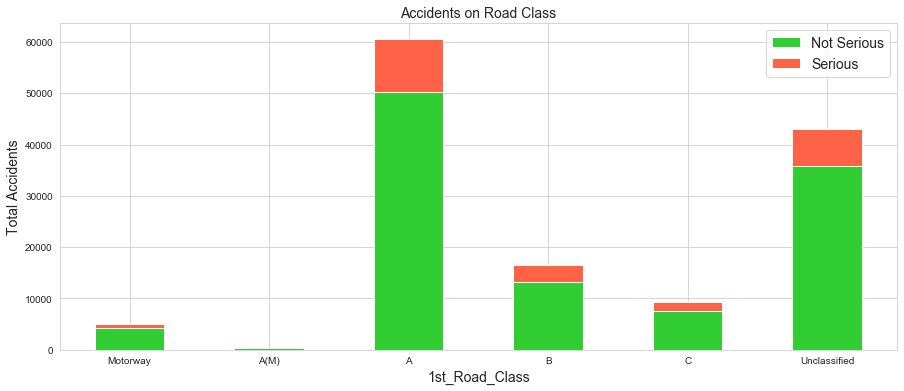

In [67]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('1st_Road_Class', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Accidents on Road Class', fontsize=14);

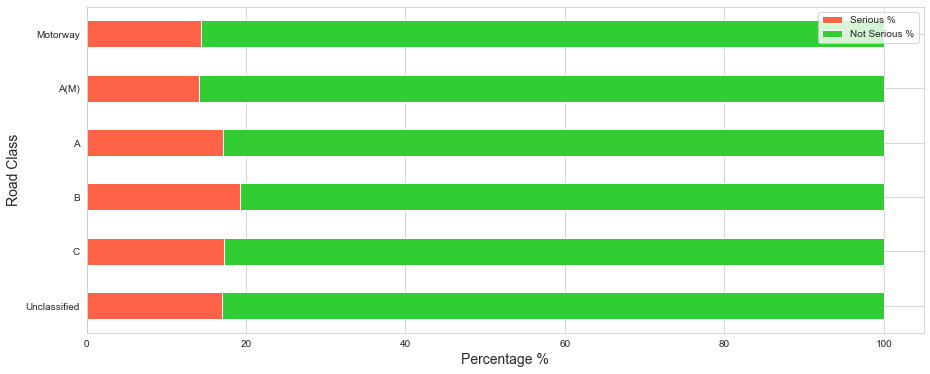

In [68]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Road Class', fontsize=14);

### 10. Road Type

In [69]:
grs = data[['Road_Type','Seriousness','Accident_Index']].groupby(['Road_Type','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Road_Type', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Roundabout',2:'One way Street',3:'Dual Carriageway',6:'Single Carriageway',7:'Slip Road',9:'Unknown'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

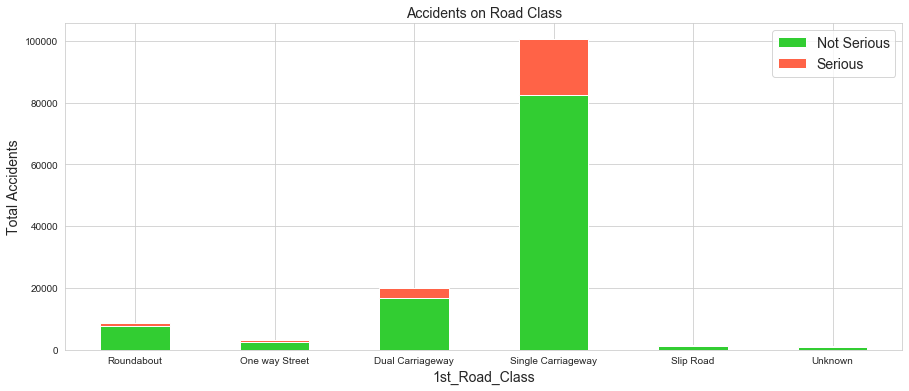

In [70]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('1st_Road_Class', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Accidents on Road Class', fontsize=14);

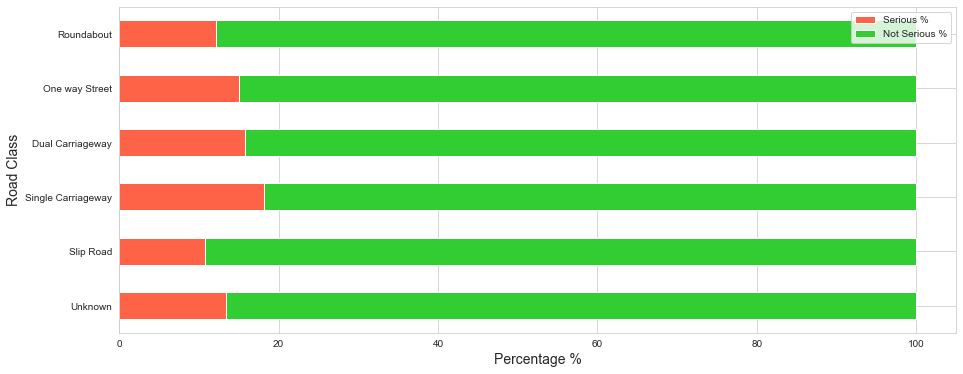

In [71]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Road Class', fontsize=14);

### 11. Speed Limit

* For roads in built-up areas, general speed limit is 30 mph.
* For Motorways, general speed limit is 60 mph.

In [72]:
grs = data[['Speed_limit','Seriousness','Accident_Index']].groupby(['Speed_limit','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Speed_limit', columns='Seriousness', values='Accident_Index')
count = count.rename(index={20:'20 mph',30:'30 mph',40:'40 mph',50:'50 mph',60:'60 mph',70:'70 mph'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

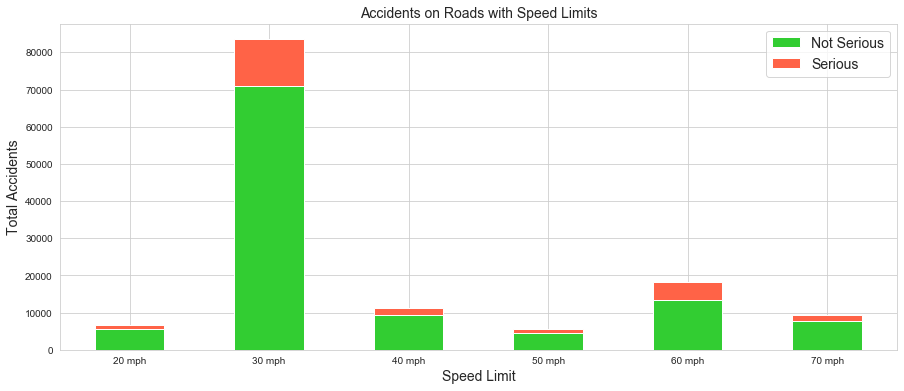

In [73]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Speed Limit', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Accidents on Roads with Speed Limits', fontsize=14);

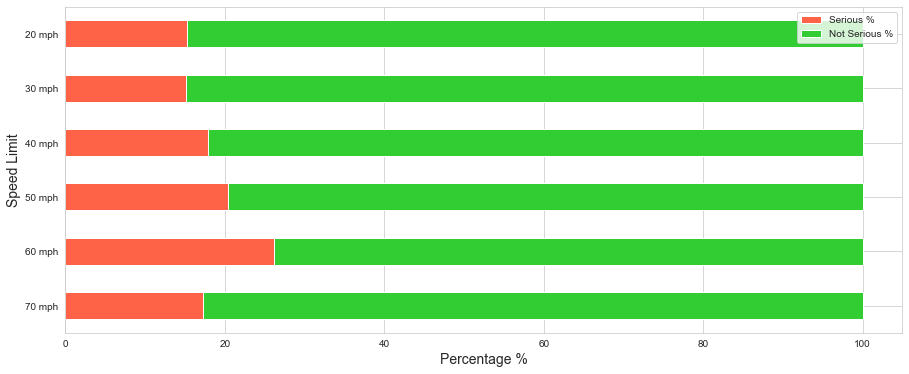

In [74]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Speed Limit', fontsize=14);

### 12. Junction Detail

In [75]:
grs = data[['Junction_Detail','Seriousness','Accident_Index']].groupby(['Junction_Detail','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Junction_Detail', columns='Seriousness', values='Accident_Index')
count = count.rename(index={0:'Not at junction or within 20 metres',1:'Roundabout',2:'Mini-Roundabout',3:'T or Staggered Junction',5:'Slip Road',6:'Crossroads',7:'More than 4 arms (Not Roundabout)',8:'Private drive or Entrance',9:'Other Junction'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

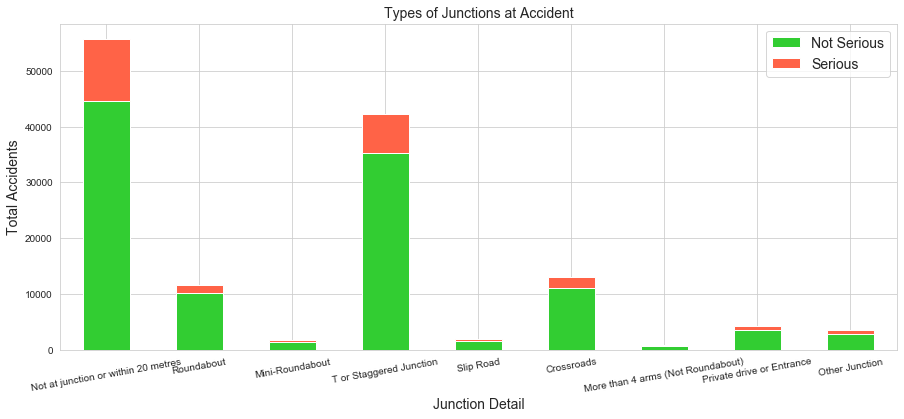

In [76]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Junction Detail', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.xticks(rotation=10)
plt.title('Types of Junctions at Accident', fontsize=14);

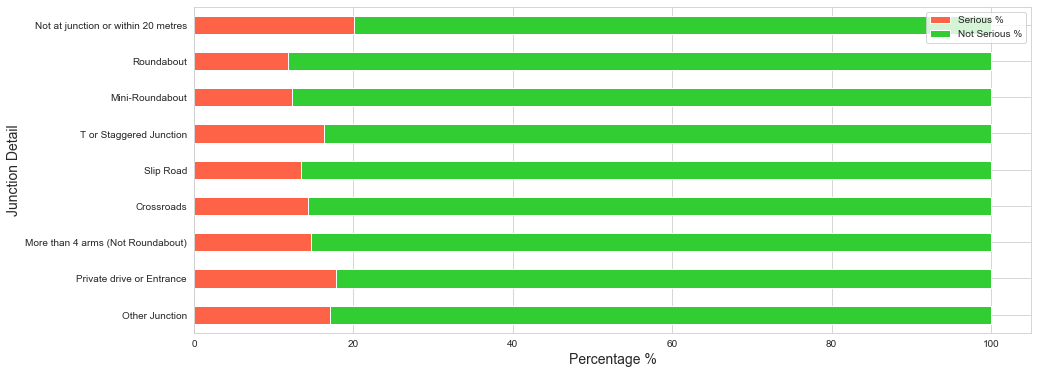

In [77]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Junction Detail', fontsize=14);

### 13. Light Conditions

In [78]:
grs = data[['Light_Conditions','Seriousness','Accident_Index']].groupby(['Light_Conditions','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Light_Conditions', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Daylight',4:'Darkness - Lights Lit',5:'Darkness - Lights Unlit',6:'Darkness - No Lighting',7:'Darkness - Lighting Unknown'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

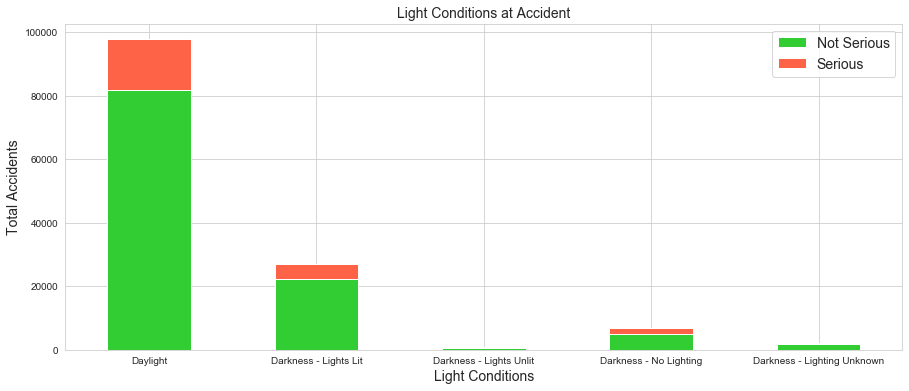

In [79]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Light Conditions', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Light Conditions at Accident', fontsize=14);

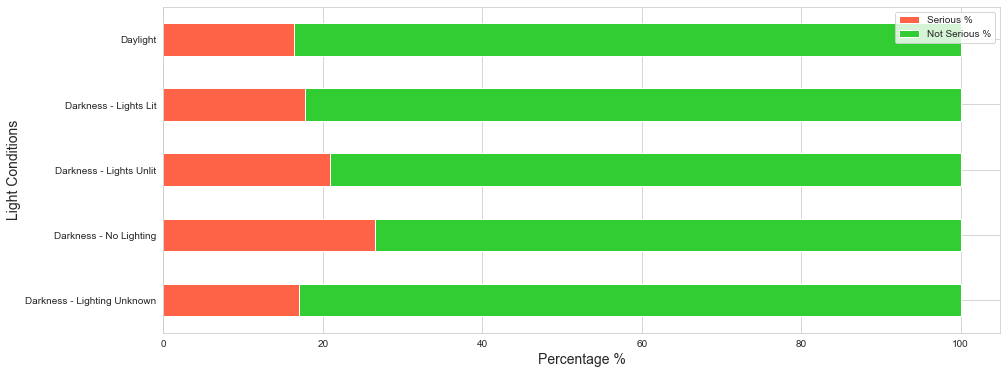

In [80]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Light Conditions', fontsize=14);

### 14. Weather Conditions

In [81]:
grs = data[['Weather_Conditions','Seriousness','Accident_Index']].groupby(['Weather_Conditions','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Weather_Conditions', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Fine, No High Winds',2:'Raining, No High Winds',3:'Snowing, No High Winds',4:'Fine + High Winds',5:'Raining + High Winds',6:'Snowing + High Winds',7:'Fog or Mist',8:'Other',9:'Unknown'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

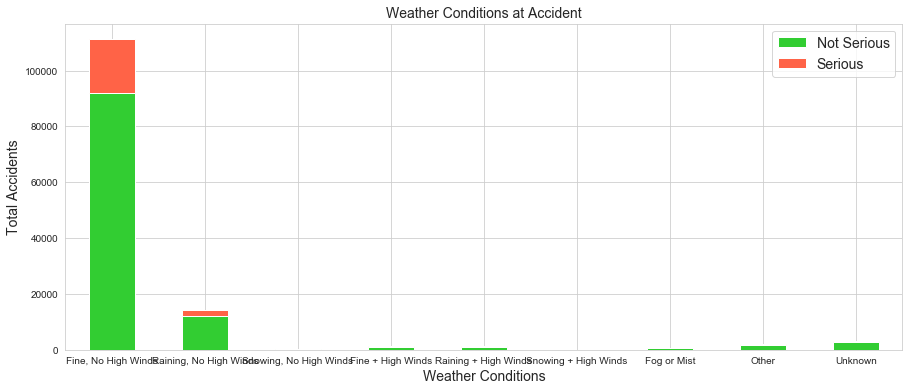

In [82]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Weather Conditions', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Weather Conditions at Accident', fontsize=14);

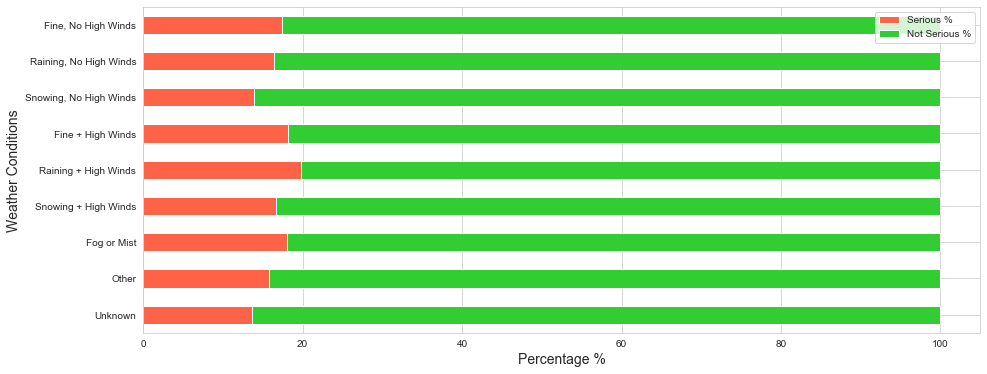

In [83]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Weather Conditions', fontsize=14);

### 15. Road Surface Conditions

In [84]:
grs = data[['Road_Surface_Conditions','Seriousness','Accident_Index']].groupby(['Road_Surface_Conditions','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Road_Surface_Conditions', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Dry',2:'Wet or Damp',3:'Snow',4:'Frost of Ice',5:'Flood over 3 cm. deep'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

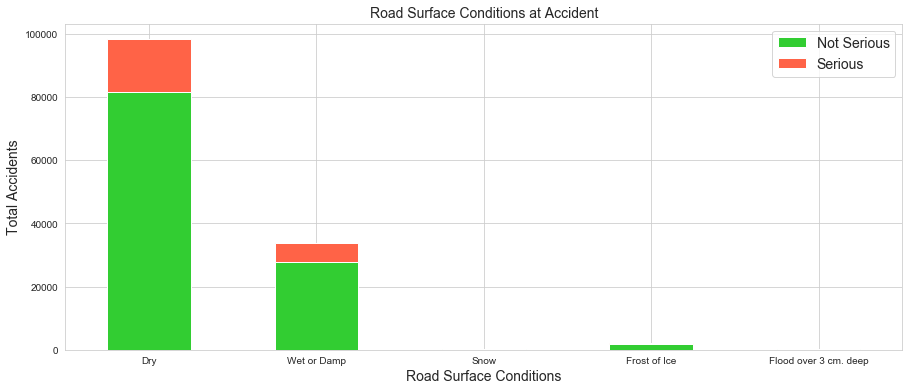

In [85]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Road Surface Conditions', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Road Surface Conditions at Accident', fontsize=14);

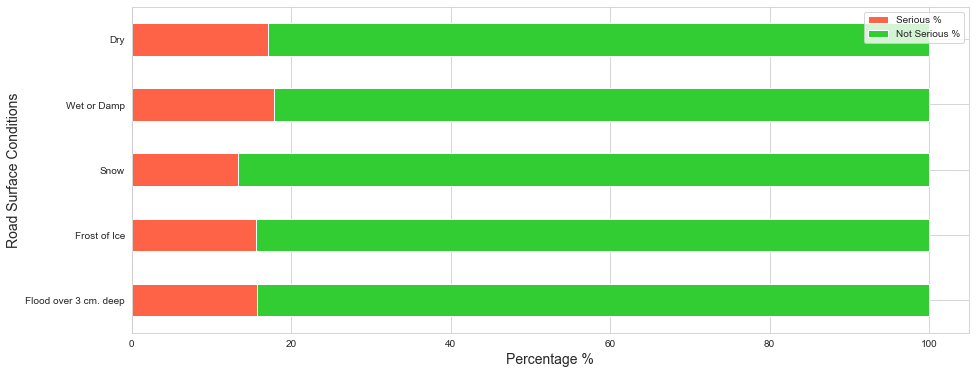

In [86]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Road Surface Conditions', fontsize=14);

### 16. Urban of Rural Area

In [87]:
grs = data[['Urban_or_Rural_Area','Seriousness','Accident_Index']].groupby(['Urban_or_Rural_Area','Seriousness']).nunique()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Urban_or_Rural_Area', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Urban',2:'Rural',3:'Unallocated'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

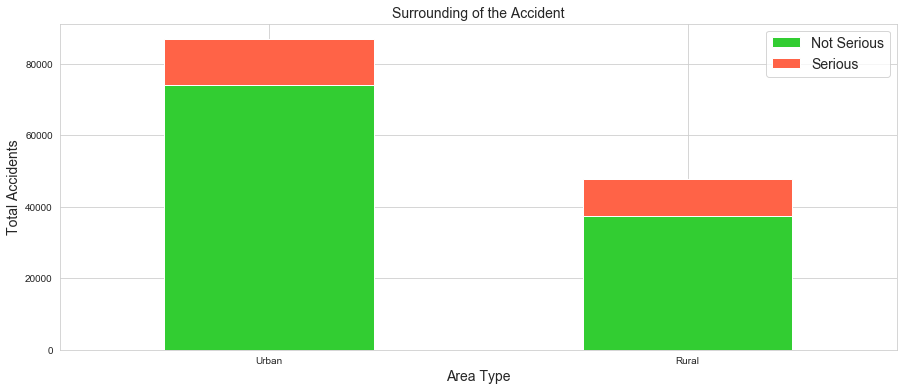

In [88]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Area Type', fontsize=14);
plt.ylabel('Total Accidents', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Surrounding of the Accident', fontsize=14);

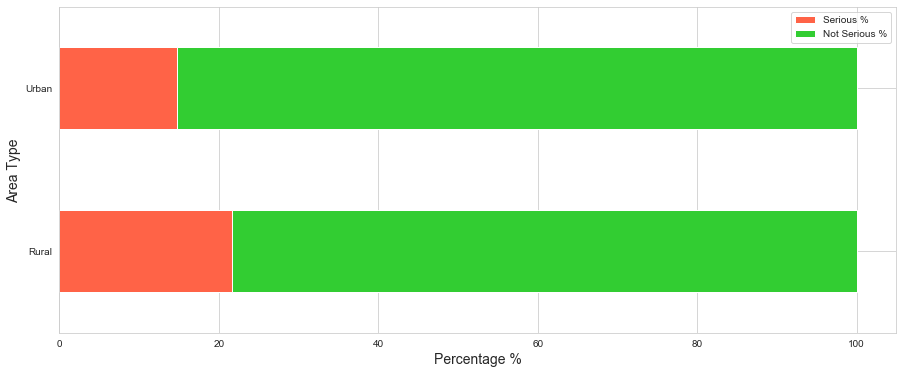

In [89]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Area Type', fontsize=14);

### 17. Total Vehicles

In [90]:
anum = data['Accident_Index'].nunique()
vnum = data['Accident_Index'].count()
vnum/anum

1.8455559185127992

In [91]:
anum

134696

In [92]:
vnum

248589

* Total 248,589 vehicles involved in total of 134,696 accidents.  
* Approx 1.84 vehicle were involved per Accident.

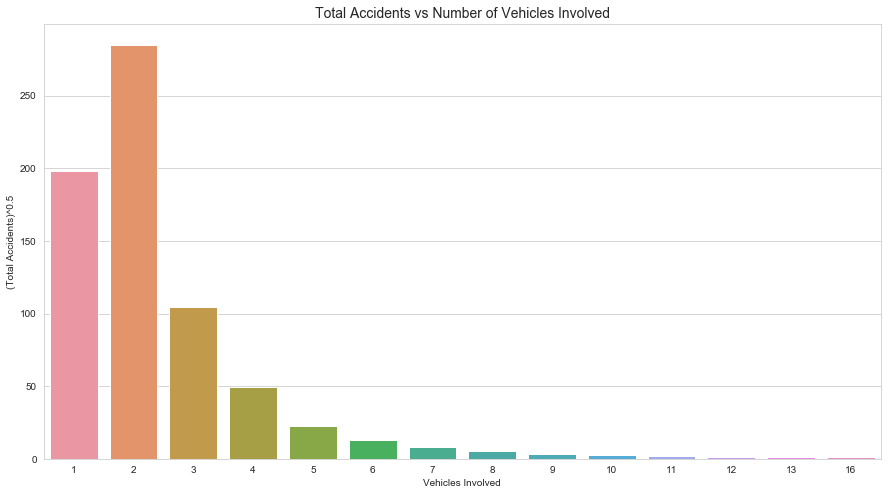

In [93]:
vn = data['Accident_Index'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=vn.groupby(vn.values).count().index, y=np.sqrt(vn.groupby(vn.values).count().values));
plt.xlabel('Vehicles Involved')
plt.ylabel('(Total Accidents)^0.5')
plt.title('Total Accidents vs Number of Vehicles Involved', fontsize=14);

In [94]:
# percentages
vn.groupby(vn.values).count()/anum*100

1     29.228782
2     60.327701
3      8.061858
4      1.793669
5      0.379373
6      0.121756
7      0.049742
8      0.019303
9      0.008167
10     0.004454
11     0.002970
12     0.000742
13     0.000742
16     0.000742
Name: Accident_Index, dtype: float64

### 18. Vehicle Type

In [95]:
grs = data[['Vehicle_Type','Seriousness','Accident_Index']].groupby(['Vehicle_Type','Seriousness']).count()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Vehicle_Type', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Urban',2:'Rural',3:'Unallocated'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

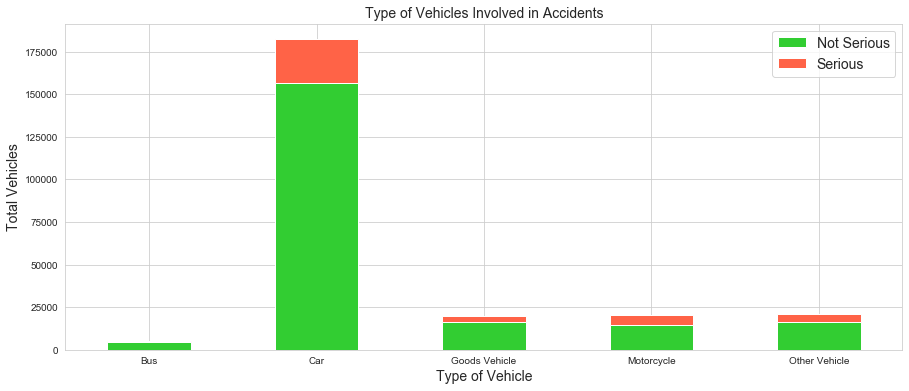

In [96]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Type of Vehicle', fontsize=14);
plt.ylabel('Total Vehicles', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Type of Vehicles Involved in Accidents', fontsize=14);

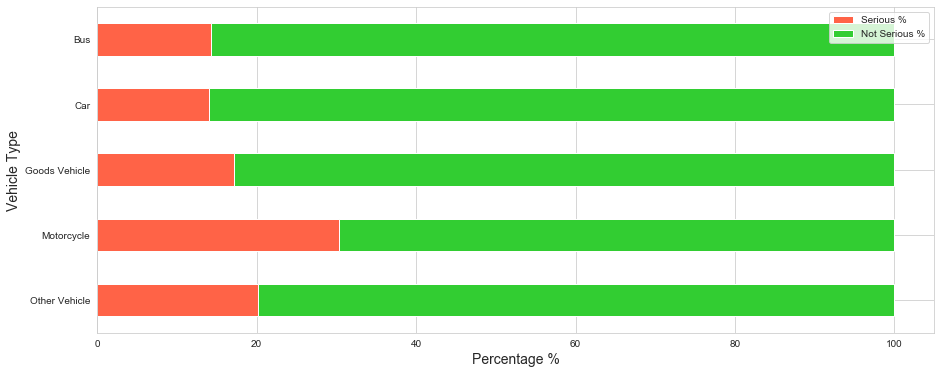

In [97]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Vehicle Type', fontsize=14);

### 19. Vehicle Manoeuver

In [100]:
grs = data[['Vehicle_Manoeuvre','Seriousness','Accident_Index']].groupby(['Vehicle_Manoeuvre','Seriousness']).count()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Vehicle_Manoeuvre', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Reversing', 2:'Parked', 3:'Waiting to go - held up',
                            4:'Slowing or stopping', 5:'Moving off', 6:'U-turn',
                            7:'Turning left', 8:'Waiting to turn left', 9:'Turning right',
                            10:'Waiting to turn right', 11:'Changing lane to left', 12:'Changing lane to right',
                            13:'Overtaking moving vehicle - offside', 14:'Overtaking static vehicle - offside',
                            15:'Overtaking - nearside', 16:'Going ahead left-hand bend',
                            17:'Going ahead right-hand bend', 18:'Going ahead other'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

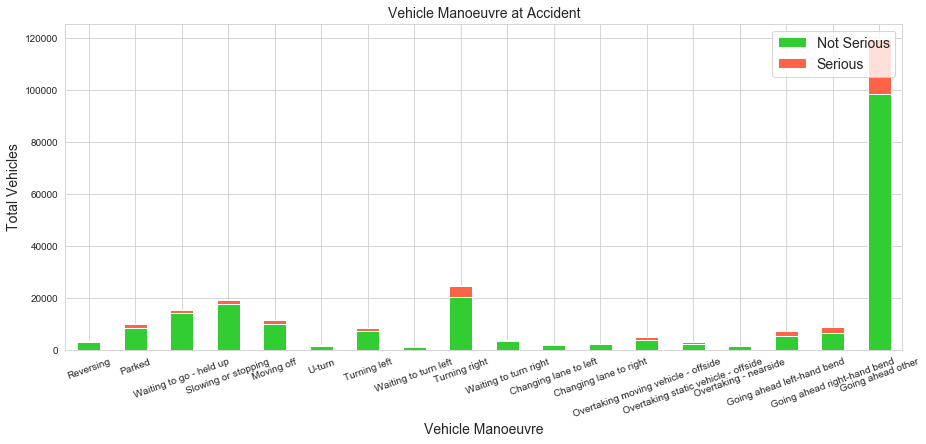

In [101]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Vehicle Manoeuvre', fontsize=14);
plt.ylabel('Total Vehicles', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.xticks(rotation=20)
plt.title('Vehicle Manoeuvre at Accident', fontsize=14);

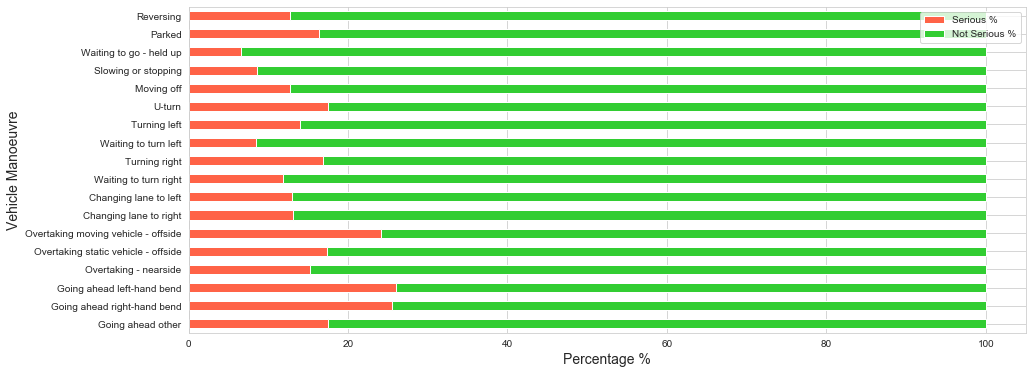

In [102]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Vehicle Manoeuvre', fontsize=14);

### 20. Junction Location

In [103]:
grs = data[['Junction_Location','Seriousness','Accident_Index']].groupby(['Junction_Location','Seriousness']).count()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Junction_Location', columns='Seriousness', values='Accident_Index')
count = count.rename(index={0:'Not at or within 20 metres of junction', 1:'Approaching junction or waiting/parked at junction approach',
                            2:'Cleared junction or waiting/parked at junction exit', 3:'Leaving roundabout',
                            4:'Entering roundabout', 5:'Leaving main road', 6:'Entering main road',
                            7:'Entering from slip road', 8:'Mid Junction - on roundabout or on main road'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

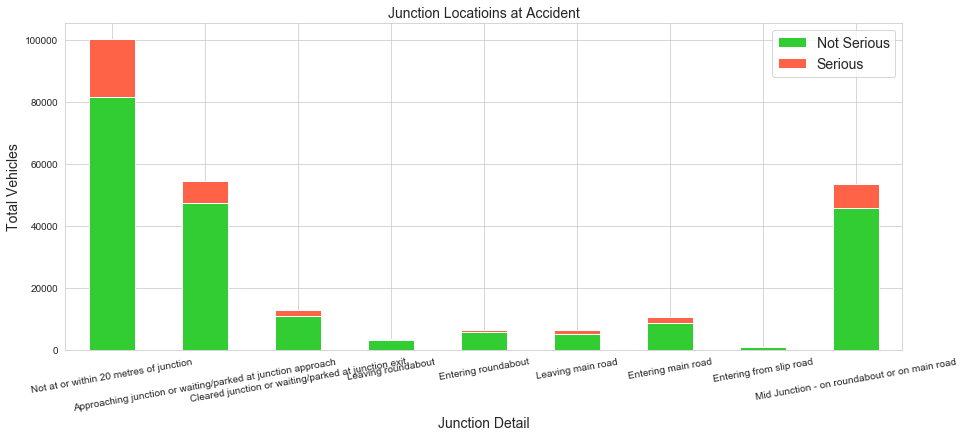

In [104]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Junction Detail', fontsize=14);
plt.ylabel('Total Vehicles', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.xticks(rotation=10)
plt.title('Junction Locatioins at Accident', fontsize=14);

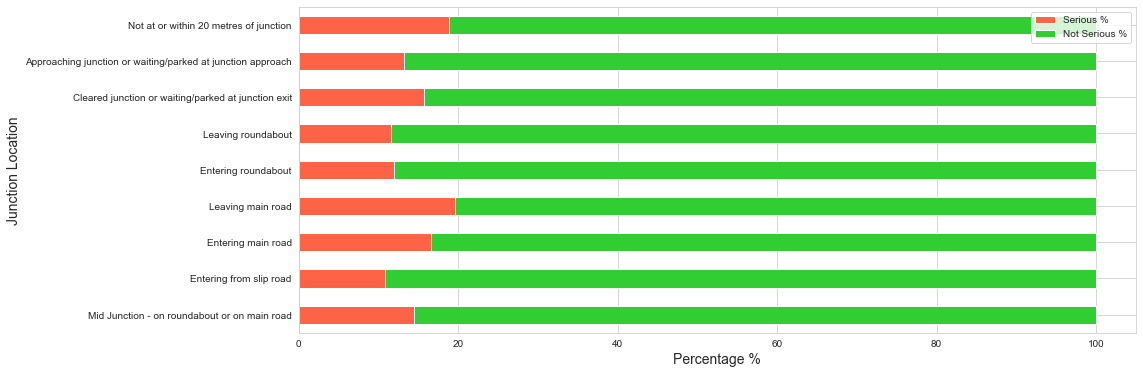

In [105]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Junction Location', fontsize=14);

### 21. First Point of Impact

In [106]:
grs = data[['1st_Point_of_Impact','Seriousness','Accident_Index']].groupby(['1st_Point_of_Impact','Seriousness']).count()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='1st_Point_of_Impact', columns='Seriousness', values='Accident_Index')
count = count.rename(index={0:'Did not Impact', 1:'Front', 2:'Back', 3:'Offside', 4:'Nearside'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

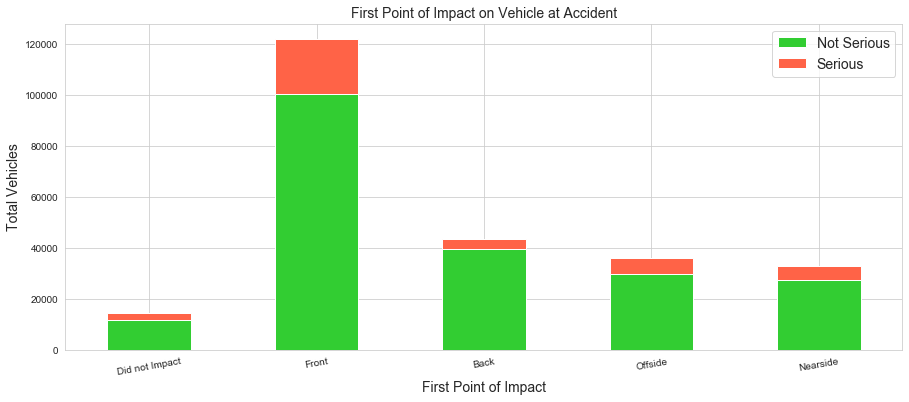

In [107]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('First Point of Impact', fontsize=14);
plt.ylabel('Total Vehicles', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.xticks(rotation=10)
plt.title('First Point of Impact on Vehicle at Accident', fontsize=14);

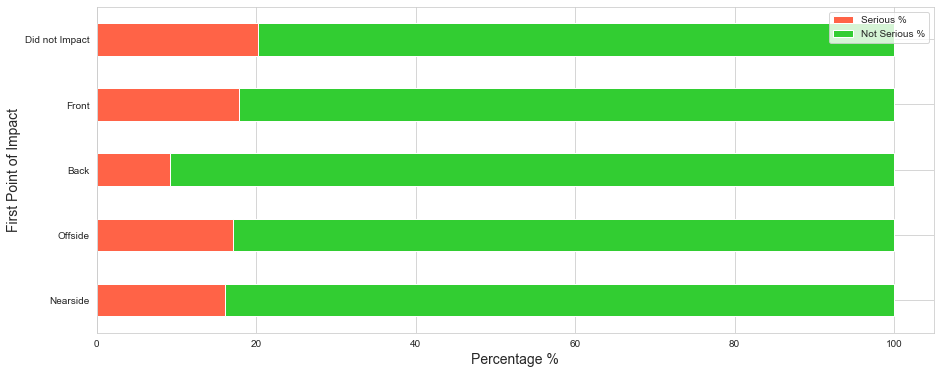

In [108]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('First Point of Impact', fontsize=14);

### 22. Gender of Driver

In [109]:
grs = data[['Sex_of_Driver','Seriousness','Accident_Index']].groupby(['Sex_of_Driver','Seriousness']).count()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Sex_of_Driver', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'Male', 2:'Female', 3:'Not known'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

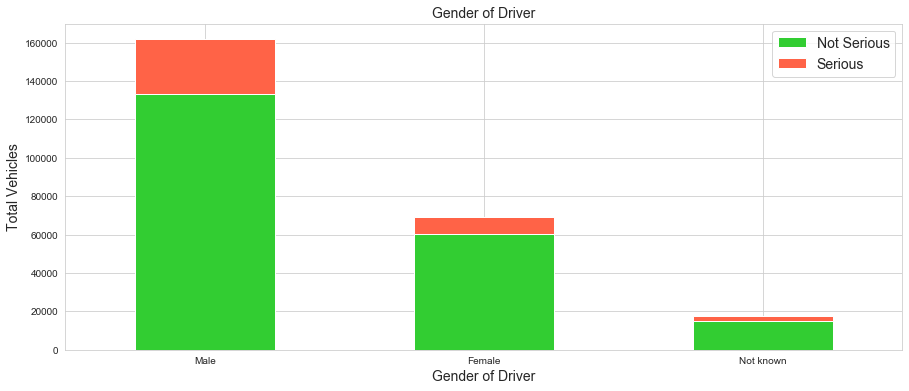

In [110]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Gender of Driver', fontsize=14);
plt.ylabel('Total Vehicles', fontsize=14);
plt.legend(loc=1, fontsize=14)
plt.title('Gender of Driver', fontsize=14);

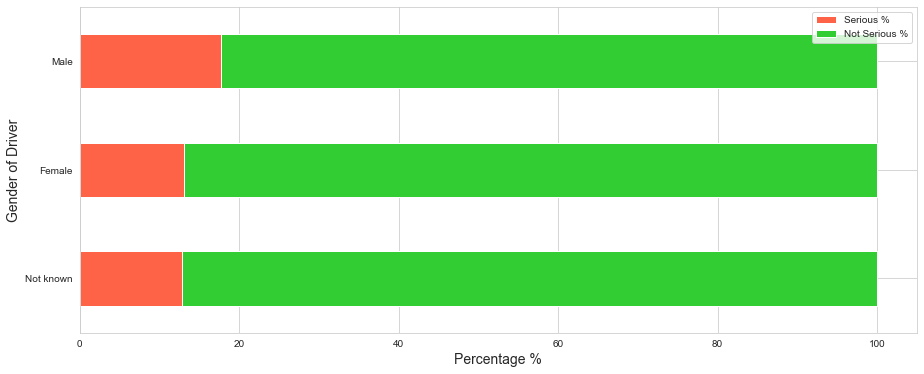

In [111]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Gender of Driver', fontsize=14);

### 23. Age Band of Driver

In [112]:
grs = data[['Age_Band_of_Driver','Seriousness','Accident_Index']].groupby(['Age_Band_of_Driver','Seriousness']).count()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Age_Band_of_Driver', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'0-15', 2:'16-25', 3:'26-45', 4:'46-65', 5:'65+'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

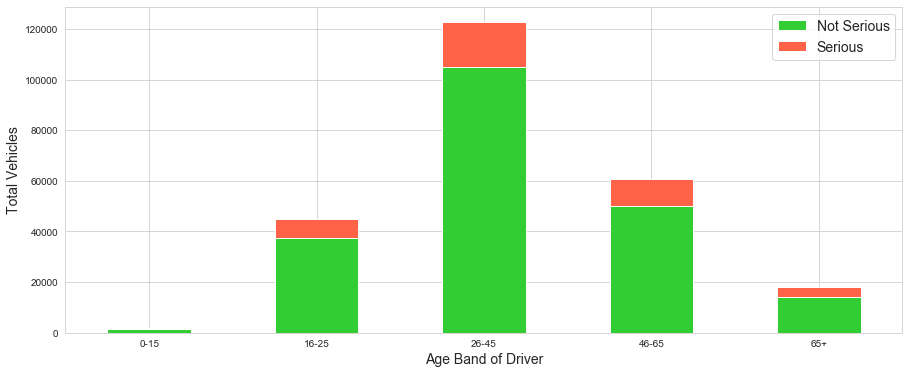

In [113]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Age Band of Driver', fontsize=14);
plt.ylabel('Total Vehicles', fontsize=14);
plt.legend(loc=1, fontsize=14);

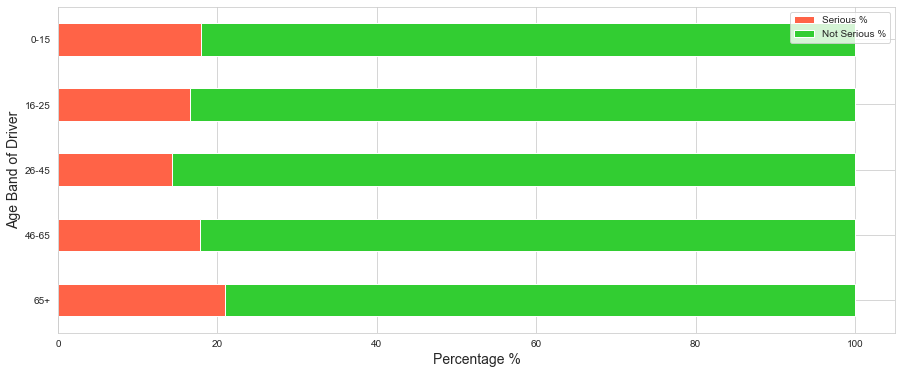

In [114]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Age Band of Driver', fontsize=14);

### 24. Age Band of Vehicles

In [115]:
grs = data[['Age_of_Vehicle','Seriousness','Accident_Index']].groupby(['Age_of_Vehicle','Seriousness']).count()
grs.reset_index(level=-1,inplace=True)
grs.reset_index(level=-1,inplace=True)
count = grs.pivot(index='Age_of_Vehicle', columns='Seriousness', values='Accident_Index')
count = count.rename(index={1:'0-2', 2:'3-5', 3:'6-8', 4:'9-12', 5:'13-15', 6:'16-22', 7:'22+'})
perc = count.copy()
perc['Sum'] = perc.sum(axis=1)
perc['Serious'] = perc['Serious']/perc['Sum']*100
perc['Not Serious'] = perc['Not Serious']/perc['Sum']*100
perc = perc.drop(['Sum'], axis=1)

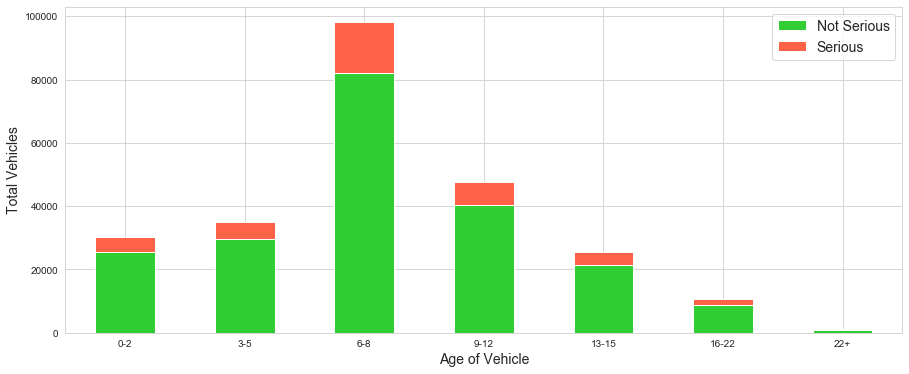

In [116]:
count.plot(kind='bar', stacked=True, figsize=(15,6), rot=0, color=['limegreen','tomato']);
plt.xlabel('Age of Vehicle', fontsize=14);
plt.ylabel('Total Vehicles', fontsize=14);
plt.legend(loc=1, fontsize=14);

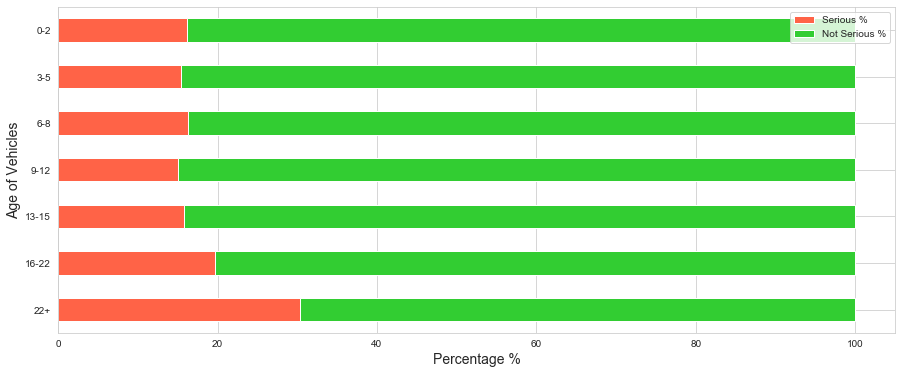

In [117]:
perc.iloc[::-1,::-1].plot(kind='barh',stacked=True, figsize=(15,6), rot=0, color=['tomato','limegreen']) 
plt.legend(['Serious %','Not Serious %'])
plt.xlabel('Percentage %', fontsize=14)
plt.ylabel('Age of Vehicles', fontsize=14);